<a href="https://colab.research.google.com/github/psyifa/Personality-Classification/blob/main/Preprocess_Stemming_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mengimpor Library

In [ ]:
import os
import pandas as pd
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re

In [ ]:
from nltk.tokenize import TweetTokenizer

#Membaca Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
source_folder = '/content/drive/My Drive/TugasAkhir/Data'
destination_folder = '/content/drive/My Drive/TugasAkhir/Model'

In [ ]:
data_file = source_folder + '/data_twitter.csv'
data = pd.read_csv(data_file, encoding='utf-8')
data.head()

,username,datetime,tweet,label
0,a2lir,0,2,Openness
1,a2lir,2021-03-19 12:32:52,zsjl whoa☺️✨,Openness
2,a2lir,2021-03-18 06:32:57,@zxc23h @cucunyapakahmad HAHA I'll look at bot...,Openness
3,a2lir,2021-03-18 05:32:48,"@zxc23h Recommend a good one, please",Openness
4,a2lir,2021-03-18 05:31:50,RT @animetv_jp: JUJUTSU KAISEN Episode 23 this...,Openness


#Preprocessing

In [ ]:
data.isnull().sum()

,0
username,0
datetime,13
tweet,13
label,0


In [ ]:
# Hapus data null
data.dropna(inplace=True)

data.isnull().sum()

,0
username,0
datetime,0
tweet,0
label,0


##Casefolding

In [ ]:
def casefolding(text):
    return text.lower()

# Menerapkan casefolding dan menyimpan hasilnya di kolom 'clean_tweet'
data['casefolding'] = data['tweet'].apply(casefolding)

data = data[['username', 'label', 'tweet', 'casefolding']]
data.head()

,username,label,tweet,casefolding
0,a2lir,Openness,2,2
1,a2lir,Openness,zsjl whoa☺️✨,zsjl whoa☺️✨
2,a2lir,Openness,@zxc23h @cucunyapakahmad HAHA I'll look at bot...,@zxc23h @cucunyapakahmad haha i'll look at bot...
3,a2lir,Openness,"@zxc23h Recommend a good one, please","@zxc23h recommend a good one, please"
4,a2lir,Openness,RT @animetv_jp: JUJUTSU KAISEN Episode 23 this...,rt @animetv_jp: jujutsu kaisen episode 23 this...


##Cleaning

In [ ]:
import re
import string

# Pola untuk mendeteksi emoji
emoji_pattern = (
    r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF'
    r'\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF'
    r'\U0001F900-\U0001F9FF\U0001FA00-\U0001FAFF\U0001FB00-\U0001FBFF'
    r'\U0001F1E6-\U0001F1FF\u2600-\u26FF\u2700-\u27BF\uFE0F]'
)

# Fungsi gabungan untuk membersihkan teks
def clean_text(text):
    if isinstance(text, str):
        # Daftar emoji yang ditemukan di teks
        emoticons = re.findall(emoji_pattern, text)
        if emoticons:
            print(f'Emoticons found: {emoticons}')

        # Menghapus emoji
        text = re.sub(emoji_pattern, '', text)
        # Menghapus ticker pasar saham seperti $GE
        text = re.sub(r'\$\w*', '', text)
        # Menghapus teks retweet lama "RT"
        text = re.sub(r'^rt[\s]+', '', text, flags=re.IGNORECASE)
        # Menghapus hyperlink
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Menghapus mention (@username)
        text = re.sub(r'@\w+', '', text)
        # Menghapus hashtag (hanya menghapus simbol # dari kata)
        text = re.sub(r'#', '', text)
        # Menghapus angka
        text = re.sub(r'[0-9]+', '', text)
        # Menghapus tanda baca
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Menghapus spasi berlebih
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        text = ""  # Jika input bukan string, set menjadi string kosong

    return text

# Terapkan ke kolom 'casefolding' dan simpan hasilnya ke 'cleantext'
data['cleantext'] = data['casefolding'].apply(clean_text)


Streaming output truncated to the last 5000 lines.
Emoticons found: ['😊']
Emoticons found: ['😂']
Emoticons found: ['😭', '😭']
Emoticons found: ['😆']
Emoticons found: ['🙏', '😊']
Emoticons found: ['😭', '😭']
Emoticons found: ['😂', '😂']
Emoticons found: ['😂']
Emoticons found: ['😌']
Emoticons found: ['😂']
Emoticons found: ['😣', '😣']
Emoticons found: ['😣', '😩']
Emoticons found: ['😂']
Emoticons found: ['😣']
Emoticons found: ['😂']
Emoticons found: ['😂']
Emoticons found: ['😂']
Emoticons found: ['😣']
Emoticons found: ['😭', '😭']
Emoticons found: ['😣']
Emoticons found: ['🎶']
Emoticons found: ['💣', '💣', '💣']
Emoticons found: ['😷', '😷']
Emoticons found: ['😭', '😭']
Emoticons found: ['😫']
Emoticons found: ['😩']
Emoticons found: ['😅']
Emoticons found: ['😑']
Emoticons found: ['😌', '😌']
Emoticons found: ['👨', '👧', '😌']
Emoticons found: ['😌']
Emoticons found: ['😌']
Emoticons found: ['😂']
Emoticons found: ['😩']
Emoticons found: ['😣']
Emoticons found: ['😑']
Emoticons found: ['😂']
Emoticons found: ['😂']
Emoti

In [ ]:
data.head()

,username,label,tweet,casefolding,cleantext
0,a2lir,Openness,2,2,
1,a2lir,Openness,zsjl whoa☺️✨,zsjl whoa☺️✨,zsjl whoa
2,a2lir,Openness,@zxc23h @cucunyapakahmad HAHA I'll look at bot...,@zxc23h @cucunyapakahmad haha i'll look at bot...,haha ill look at both thank you lovebirds
3,a2lir,Openness,"@zxc23h Recommend a good one, please","@zxc23h recommend a good one, please",recommend a good one please
4,a2lir,Openness,RT @animetv_jp: JUJUTSU KAISEN Episode 23 this...,rt @animetv_jp: jujutsu kaisen episode 23 this...,jujutsu kaisen episode this friday only episod...


##Tokenisasi

In [ ]:
# Tokenisasi pada kolom 'clean_text' dan menyimpannya kembali di kolom yang sama
def tokenize(text):
    # Inisialisasi tokenizer
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    # Tokenisasi
    tweet_tokens = tokenizer.tokenize(text)
    return tweet_tokens

# Menerapkan tokenisasi pada kolom 'clean_text'
data['tokens'] = data['cleantext'].apply(tokenize)

In [ ]:
data.head()

,username,label,tweet,casefolding,cleantext,tokens
0,a2lir,Openness,2,2,,[]
1,a2lir,Openness,zsjl whoa☺️✨,zsjl whoa☺️✨,zsjl whoa,"[zsjl, whoa]"
2,a2lir,Openness,@zxc23h @cucunyapakahmad HAHA I'll look at bot...,@zxc23h @cucunyapakahmad haha i'll look at bot...,haha ill look at both thank you lovebirds,"[haha, ill, look, at, both, thank, you, lovebi..."
3,a2lir,Openness,"@zxc23h Recommend a good one, please","@zxc23h recommend a good one, please",recommend a good one please,"[recommend, a, good, one, please]"
4,a2lir,Openness,RT @animetv_jp: JUJUTSU KAISEN Episode 23 this...,rt @animetv_jp: jujutsu kaisen episode 23 this...,jujutsu kaisen episode this friday only episod...,"[jujutsu, kaisen, episode, this, friday, only,..."


##Normalisasi

In [ ]:
# Membaca kamus slang dari file CSV
slang_dict = pd.read_csv(source_folder + '/gabungan_kamus.csv', delimiter=';')

# Menampilkan data dari kamus slang
slang_dict.head()

,original,replacement
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa


In [ ]:
slang_dict_map = dict(zip(slang_dict['original'], slang_dict['replacement']))

# Fungsi untuk normalisasi slang
def normalize_slang(tokens):
    return [slang_dict_map[word] if word in slang_dict_map else word for word in tokens]

# Melakukan normalisasi setelah tokenisasi
data['normalized_tokens'] = data['tokens'].apply(normalize_slang)

In [ ]:
data.head()

,username,label,tweet,casefolding,cleantext,tokens,normalized_tokens
0,a2lir,Openness,2,2,,[],[]
1,a2lir,Openness,zsjl whoa☺️✨,zsjl whoa☺️✨,zsjl whoa,"[zsjl, whoa]","[zsjl, whoa]"
2,a2lir,Openness,@zxc23h @cucunyapakahmad HAHA I'll look at bot...,@zxc23h @cucunyapakahmad haha i'll look at bot...,haha ill look at both thank you lovebirds,"[haha, ill, look, at, both, thank, you, lovebi...","[tertawa, saya, lihat, di, keduanya, thank, yo..."
3,a2lir,Openness,"@zxc23h Recommend a good one, please","@zxc23h recommend a good one, please",recommend a good one please,"[recommend, a, good, one, please]","[merekomendasikan, a, bagus, satu, tolong]"
4,a2lir,Openness,RT @animetv_jp: JUJUTSU KAISEN Episode 23 this...,rt @animetv_jp: jujutsu kaisen episode 23 this...,jujutsu kaisen episode this friday only episod...,"[jujutsu, kaisen, episode, this, friday, only,...","[jujutsu, kaisen, episode, ini, Jumat, hanya, ..."


In [ ]:
!pip install Sastrawi stopwords

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Inisialisasi stemmer bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

##Penghapusan Stopword

In [ ]:
import stopwords

# Mendapatkan daftar stopwords bahasa Indonesia
stop_words_id = stopwords.get_stopwords("id")

# Fungsi untuk menghapus stopwords
def remove_stopwords_id(tokens):
    return [word for word in tokens if word not in stop_words_id]

# Terapkan penghapusan stopwords pada kolom 'stemming_tokens'
data['stopwords_tokens'] = data['normalized_tokens'].apply(remove_stopwords_id)

In [ ]:
data.head()

,username,label,tweet,casefolding,cleantext,tokens,normalized_tokens,stopwords_tokens
0,a2lir,Openness,2,2,,[],[],[]
1,a2lir,Openness,zsjl whoa☺️✨,zsjl whoa☺️✨,zsjl whoa,"[zsjl, whoa]","[zsjl, whoa]","[zsjl, whoa]"
2,a2lir,Openness,@zxc23h @cucunyapakahmad HAHA I'll look at bot...,@zxc23h @cucunyapakahmad haha i'll look at bot...,haha ill look at both thank you lovebirds,"[haha, ill, look, at, both, thank, you, lovebi...","[tertawa, saya, lihat, di, keduanya, thank, yo...","[tertawa, lihat, di, keduanya, thank, you, pas..."
3,a2lir,Openness,"@zxc23h Recommend a good one, please","@zxc23h recommend a good one, please",recommend a good one please,"[recommend, a, good, one, please]","[merekomendasikan, a, bagus, satu, tolong]","[merekomendasikan, a, bagus, satu, tolong]"
4,a2lir,Openness,RT @animetv_jp: JUJUTSU KAISEN Episode 23 this...,rt @animetv_jp: jujutsu kaisen episode 23 this...,jujutsu kaisen episode this friday only episod...,"[jujutsu, kaisen, episode, this, friday, only,...","[jujutsu, kaisen, episode, ini, Jumat, hanya, ...","[jujutsu, kaisen, episode, Jumat, episode, ter..."


##Stemming

In [ ]:
# Fungsi untuk melakukan stemming pada tokens
def stem_tokens_indonesia(tokens):
    return [stemmer.stem(word) for word in tokens]

# Terapkan stemming pada kolom 'normalized_tokens'
data['stemming_tokens'] = data['stopwords_tokens'].apply(stem_tokens_indonesia)

In [ ]:
data.head()

,username,label,tweet,casefolding,cleantext,tokens,normalized_tokens,stopwords_tokens,stemming_tokens
0,a2lir,Openness,2,2,,[],[],[],[]
1,a2lir,Openness,zsjl whoa☺️✨,zsjl whoa☺️✨,zsjl whoa,"[zsjl, whoa]","[zsjl, whoa]","[zsjl, whoa]","[zsjl, whoa]"
2,a2lir,Openness,@zxc23h @cucunyapakahmad HAHA I'll look at bot...,@zxc23h @cucunyapakahmad haha i'll look at bot...,haha ill look at both thank you lovebirds,"[haha, ill, look, at, both, thank, you, lovebi...","[tertawa, saya, lihat, di, keduanya, thank, yo...","[tertawa, lihat, di, keduanya, thank, you, pas...","[tertawa, lihat, di, dua, thank, you, pasang]"
3,a2lir,Openness,"@zxc23h Recommend a good one, please","@zxc23h recommend a good one, please",recommend a good one please,"[recommend, a, good, one, please]","[merekomendasikan, a, bagus, satu, tolong]","[merekomendasikan, a, bagus, satu, tolong]","[rekomendasi, a, bagus, satu, tolong]"
4,a2lir,Openness,RT @animetv_jp: JUJUTSU KAISEN Episode 23 this...,rt @animetv_jp: jujutsu kaisen episode 23 this...,jujutsu kaisen episode this friday only episod...,"[jujutsu, kaisen, episode, this, friday, only,...","[jujutsu, kaisen, episode, ini, Jumat, hanya, ...","[jujutsu, kaisen, episode, Jumat, episode, ter...","[jujutsu, kaisen, episode, jumat, episode, sisa]"


In [ ]:
# Simpan hasil stemming ke file CSV
data.to_csv(destination_folder + '/data_tweet_stemming.csv', encoding='utf-8', index=False)

In [ ]:
data_file = destination_folder + '/data_tweet_stemming.csv'
data = pd.read_csv(data_file, encoding='utf-8')
data.head()

,username,label,tweet,casefolding,cleantext,tokens,normalized_tokens,stopwords_tokens,stemming_tokens
0,a2lir,Openness,2,2,NaN,[],[],[],[]
1,a2lir,Openness,zsjl whoa☺️✨,zsjl whoa☺️✨,zsjl whoa,"['zsjl', 'whoa']","['zsjl', 'whoa']","['zsjl', 'whoa']","['zsjl', 'whoa']"
2,a2lir,Openness,@zxc23h @cucunyapakahmad HAHA I'll look at bot...,@zxc23h @cucunyapakahmad haha i'll look at bot...,haha ill look at both thank you lovebirds,"['haha', 'ill', 'look', 'at', 'both', 'thank',...","['tertawa', 'saya', 'lihat', 'di', 'keduanya',...","['tertawa', 'lihat', 'di', 'keduanya', 'thank'...","['tertawa', 'lihat', 'di', 'dua', 'thank', 'yo..."
3,a2lir,Openness,"@zxc23h Recommend a good one, please","@zxc23h recommend a good one, please",recommend a good one please,"['recommend', 'a', 'good', 'one', 'please']","['merekomendasikan', 'a', 'bagus', 'satu', 'to...","['merekomendasikan', 'a', 'bagus', 'satu', 'to...","['rekomendasi', 'a', 'bagus', 'satu', 'tolong']"
4,a2lir,Openness,RT @animetv_jp: JUJUTSU KAISEN Episode 23 this...,rt @animetv_jp: jujutsu kaisen episode 23 this...,jujutsu kaisen episode this friday only episod...,"['jujutsu', 'kaisen', 'episode', 'this', 'frid...","['jujutsu', 'kaisen', 'episode', 'ini', 'Jumat...","['jujutsu', 'kaisen', 'episode', 'Jumat', 'epi...","['jujutsu', 'kaisen', 'episode', 'jumat', 'epi..."


In [ ]:
import ast

# Ubah kolom 'stemming_tokens' menjadi daftar Python
data['stemming_tokens'] = data['stemming_tokens'].apply(ast.literal_eval)

In [ ]:
# Fungsi untuk melakukan untokenisasi
def untokenize(tokens):
    return ' '.join(tokens)

# Terapkan untokenisasi pada kolom 'stemming_tokens'
data['untokenized_tweet'] = data['stemming_tokens'].apply(untokenize)


In [ ]:
data.head()

,username,label,tweet,casefolding,cleantext,tokens,normalized_tokens,stopwords_tokens,stemming_tokens,untokenized_tweet
0,a2lir,Openness,2,2,NaN,[],[],[],[],
1,a2lir,Openness,zsjl whoa☺️✨,zsjl whoa☺️✨,zsjl whoa,"['zsjl', 'whoa']","['zsjl', 'whoa']","['zsjl', 'whoa']","[zsjl, whoa]",zsjl whoa
2,a2lir,Openness,@zxc23h @cucunyapakahmad HAHA I'll look at bot...,@zxc23h @cucunyapakahmad haha i'll look at bot...,haha ill look at both thank you lovebirds,"['haha', 'ill', 'look', 'at', 'both', 'thank',...","['tertawa', 'saya', 'lihat', 'di', 'keduanya',...","['tertawa', 'lihat', 'di', 'keduanya', 'thank'...","[tertawa, lihat, di, dua, thank, you, pasang]",tertawa lihat di dua thank you pasang
3,a2lir,Openness,"@zxc23h Recommend a good one, please","@zxc23h recommend a good one, please",recommend a good one please,"['recommend', 'a', 'good', 'one', 'please']","['merekomendasikan', 'a', 'bagus', 'satu', 'to...","['merekomendasikan', 'a', 'bagus', 'satu', 'to...","[rekomendasi, a, bagus, satu, tolong]",rekomendasi a bagus satu tolong
4,a2lir,Openness,RT @animetv_jp: JUJUTSU KAISEN Episode 23 this...,rt @animetv_jp: jujutsu kaisen episode 23 this...,jujutsu kaisen episode this friday only episod...,"['jujutsu', 'kaisen', 'episode', 'this', 'frid...","['jujutsu', 'kaisen', 'episode', 'ini', 'Jumat...","['jujutsu', 'kaisen', 'episode', 'Jumat', 'epi...","[jujutsu, kaisen, episode, jumat, episode, sisa]",jujutsu kaisen episode jumat episode sisa


##Filtering

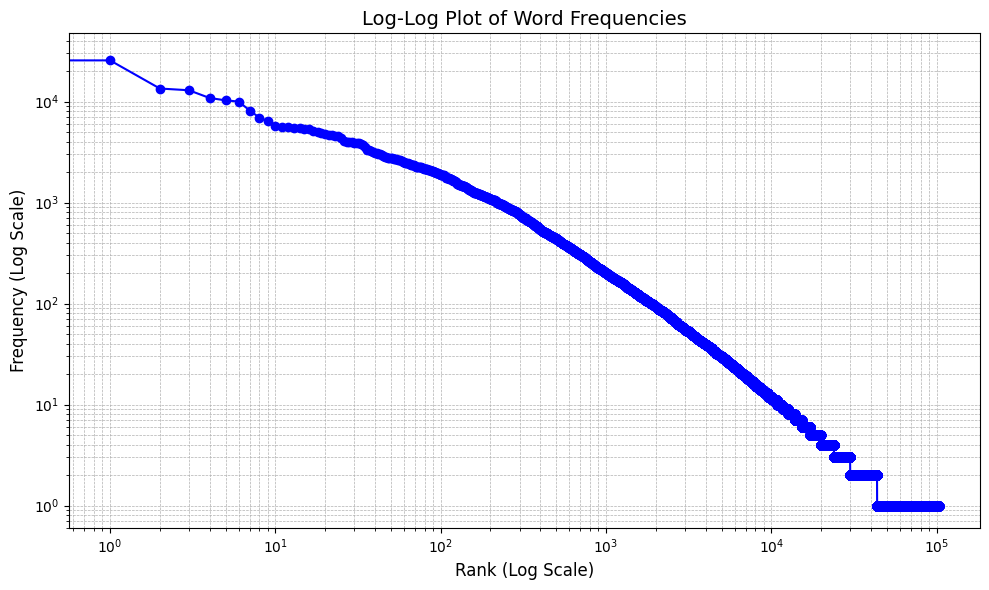

Kata dengan frekuensi tertinggi:
di: 28326
iya: 25529
tertawa: 13444
jadi: 12922
untuk: 10836
sih: 10269
orang: 9986
banget: 8136
tahu: 6927
tidak: 6424

Kata dengan frekuensi terendah:
['zsjl', 'valdes', 'metrik', 'okr', 'wahyudin', 'disguises', 'hoursdays', 'yiu', 'vigilante', 'bochorbochor']

Total kata unik: 102676
Kata dengan frekuensi 1: 59107


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Menggabungkan semua teks di kolom 'untokenized_tweet' menjadi satu string besar
all_text = ' '.join(data['untokenized_tweet'])

# Tokenisasi dan hitung frekuensi kata
word_counts = Counter(all_text.split())

# Urutkan berdasarkan frekuensi
sorted_word_counts = word_counts.most_common()

# Visualisasi distribusi frekuensi
frequencies = [count for _, count in sorted_word_counts]
plt.figure(figsize=(10, 6))
plt.loglog(frequencies, marker="o", linestyle="-", color="blue")
plt.title("Log-Log Plot of Word Frequencies", fontsize=14)
plt.xlabel("Rank (Log Scale)", fontsize=12)
plt.ylabel("Frequency (Log Scale)", fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# Menampilkan beberapa kata dengan frekuensi tertinggi
print("Kata dengan frekuensi tertinggi:")
for word, count in sorted_word_counts[:10]:  # Menampilkan 10 kata teratas
    print(f"{word}: {count}")

# Menampilkan beberapa kata dengan frekuensi terendah
print("\nKata dengan frekuensi terendah:")
low_freq_words = [word for word, count in sorted_word_counts if count == 1]
print(low_freq_words[:10])  # Menampilkan 10 kata dengan frekuensi 1

# Informasi tambahan
print(f"\nTotal kata unik: {len(word_counts)}")
print(f"Kata dengan frekuensi 1: {len(low_freq_words)}")

In [ ]:
from collections import Counter

# Menghitung frekuensi kata dari data yang sudah di-tokenisasi
all_tokens = [token for tokens in data['stemming_tokens'] for token in tokens]
word_counts = Counter(all_tokens)

# Tentukan kata dengan frekuensi rendah (misalnya yang muncul hanya 1 kali)
low_freq_words = {word for word, count in word_counts.items() if count == 1}

# Fungsi untuk menghapus kata dengan frekuensi rendah pada data yang sudah di-tokenisasi
def remove_low_freq_words(tokens):
    return [word for word in tokens if word not in low_freq_words]

# Terapkan penghapusan kata dengan frekuensi rendah pada kolom 'stopwords_tokens'
data['filtering_tokens'] = data['stemming_tokens'].apply(remove_low_freq_words)

In [ ]:
data.head()

,username,label,tweet,casefolding,cleantext,tokens,normalized_tokens,stopwords_tokens,stemming_tokens,untokenized_tweet,filtering_tokens
0,a2lir,Openness,2,2,NaN,[],[],[],[],,[]
1,a2lir,Openness,zsjl whoa☺️✨,zsjl whoa☺️✨,zsjl whoa,"['zsjl', 'whoa']","['zsjl', 'whoa']","['zsjl', 'whoa']","[zsjl, whoa]",zsjl whoa,[whoa]
2,a2lir,Openness,@zxc23h @cucunyapakahmad HAHA I'll look at bot...,@zxc23h @cucunyapakahmad haha i'll look at bot...,haha ill look at both thank you lovebirds,"['haha', 'ill', 'look', 'at', 'both', 'thank',...","['tertawa', 'saya', 'lihat', 'di', 'keduanya',...","['tertawa', 'lihat', 'di', 'keduanya', 'thank'...","[tertawa, lihat, di, dua, thank, you, pasang]",tertawa lihat di dua thank you pasang,"[tertawa, lihat, di, dua, thank, you, pasang]"
3,a2lir,Openness,"@zxc23h Recommend a good one, please","@zxc23h recommend a good one, please",recommend a good one please,"['recommend', 'a', 'good', 'one', 'please']","['merekomendasikan', 'a', 'bagus', 'satu', 'to...","['merekomendasikan', 'a', 'bagus', 'satu', 'to...","[rekomendasi, a, bagus, satu, tolong]",rekomendasi a bagus satu tolong,"[rekomendasi, a, bagus, satu, tolong]"
4,a2lir,Openness,RT @animetv_jp: JUJUTSU KAISEN Episode 23 this...,rt @animetv_jp: jujutsu kaisen episode 23 this...,jujutsu kaisen episode this friday only episod...,"['jujutsu', 'kaisen', 'episode', 'this', 'frid...","['jujutsu', 'kaisen', 'episode', 'ini', 'Jumat...","['jujutsu', 'kaisen', 'episode', 'Jumat', 'epi...","[jujutsu, kaisen, episode, jumat, episode, sisa]",jujutsu kaisen episode jumat episode sisa,"[jujutsu, kaisen, episode, jumat, episode, sisa]"


##Untokenisasi

In [ ]:
# Fungsi untuk melakukan untokenisasi (menggabungkan token kembali menjadi teks)
def untokenize(tokens):
    return ' '.join(tokens)

# Melakukan untokenisasi pada kolom 'normalized_tokens' dan simpan hasilnya di kolom 'untokenized_tweet'
data['untokenized_tweet'] = data['filtering_tokens'].apply(untokenize)

In [ ]:
data.head()

,username,label,tweet,casefolding,cleantext,tokens,normalized_tokens,stopwords_tokens,stemming_tokens,untokenized_tweet,filtering_tokens
0,a2lir,Openness,2,2,NaN,[],[],[],[],,[]
1,a2lir,Openness,zsjl whoa☺️✨,zsjl whoa☺️✨,zsjl whoa,"['zsjl', 'whoa']","['zsjl', 'whoa']","['zsjl', 'whoa']","[zsjl, whoa]",whoa,[whoa]
2,a2lir,Openness,@zxc23h @cucunyapakahmad HAHA I'll look at bot...,@zxc23h @cucunyapakahmad haha i'll look at bot...,haha ill look at both thank you lovebirds,"['haha', 'ill', 'look', 'at', 'both', 'thank',...","['tertawa', 'saya', 'lihat', 'di', 'keduanya',...","['tertawa', 'lihat', 'di', 'keduanya', 'thank'...","[tertawa, lihat, di, dua, thank, you, pasang]",tertawa lihat di dua thank you pasang,"[tertawa, lihat, di, dua, thank, you, pasang]"
3,a2lir,Openness,"@zxc23h Recommend a good one, please","@zxc23h recommend a good one, please",recommend a good one please,"['recommend', 'a', 'good', 'one', 'please']","['merekomendasikan', 'a', 'bagus', 'satu', 'to...","['merekomendasikan', 'a', 'bagus', 'satu', 'to...","[rekomendasi, a, bagus, satu, tolong]",rekomendasi a bagus satu tolong,"[rekomendasi, a, bagus, satu, tolong]"
4,a2lir,Openness,RT @animetv_jp: JUJUTSU KAISEN Episode 23 this...,rt @animetv_jp: jujutsu kaisen episode 23 this...,jujutsu kaisen episode this friday only episod...,"['jujutsu', 'kaisen', 'episode', 'this', 'frid...","['jujutsu', 'kaisen', 'episode', 'ini', 'Jumat...","['jujutsu', 'kaisen', 'episode', 'Jumat', 'epi...","[jujutsu, kaisen, episode, jumat, episode, sisa]",jujutsu kaisen episode jumat episode sisa,"[jujutsu, kaisen, episode, jumat, episode, sisa]"


In [ ]:
data.isnull().sum()

,0
username,0
label,0
tweet,0
casefolding,0
cleantext,8918
tokens,0
normalized_tokens,0
stopwords_tokens,0
stemming_tokens,0
untokenized_tweet,0


In [ ]:
(data == "").sum()

,0
username,0
label,0
tweet,0
casefolding,0
cleantext,0
tokens,0
normalized_tokens,0
stopwords_tokens,0
stemming_tokens,0
untokenized_tweet,14363


In [ ]:
data = data[(data != "").all(axis=1)]

In [ ]:
(data == "").sum()

,0
username,0
label,0
tweet,0
casefolding,0
cleantext,0
tokens,0
normalized_tokens,0
stopwords_tokens,0
stemming_tokens,0
untokenized_tweet,0


In [ ]:
# Contoh dictionary encoding
label_to_encoded = {
    'Openness': 0,
    'Agreeableness': 1,
    'Neuroticsm': 2,
    'Conscientiousness': 3,
    'Extroversion': 4
}

# Encoding kolom label
data['label_encoded'] = data['label'].map(label_to_encoded)

# Pastikan tidak ada nilai yang tidak ter-encode
print("Jumlah missing values setelah encoding:", data['label_encoded'].isnull().sum())

Jumlah missing values setelah encoding: 0


In [ ]:
# Simpan data hasil preprocessing ke file CSV di Google Drive
preprocessed_file_path = os.path.join(source_folder, 'preprocessed_data_stemming.csv')
data.to_csv(preprocessed_file_path, index=False, encoding="utf-8")

print(f"Data hasil preprocessing disimpan di: {preprocessed_file_path}")

Data hasil preprocessing disimpan di: /content/drive/My Drive/TugasAkhir/Data/preprocessed_data_stemming.csv


In [ ]:
dataclean = source_folder + '/preprocessed_data_stemming.csv'
dataclean = pd.read_csv(dataclean)
# Select only the required columns
dataclean = dataclean[['username', 'untokenized_tweet', 'label_encoded']]

# Display the first few rows of the modified DataFrame
dataclean.head()

,username,untokenized_tweet,label_encoded
0,a2lir,whoa,0
1,a2lir,tertawa lihat di dua thank you pasang,0
2,a2lir,rekomendasi a bagus satu tolong,0
3,a2lir,jujutsu kaisen episode jumat episode sisa,0
4,a2lir,aneh,0


In [ ]:
import os
import pandas as pd


dataclean['untokenized_tweet'] = dataclean['untokenized_tweet'].fillna('').astype(str)
grouped_data = dataclean.groupby('username').agg({
    'untokenized_tweet': ' '.join,
    'label_encoded': lambda x: x.iloc[0]
}).reset_index()

# Simpan hasil ke file CSV
grouped_file_path = os.path.join(source_folder, 'grouped_data_stemming.csv')
grouped_data.to_csv(grouped_file_path, index=False, encoding='utf-8')

print("Grouped data saved to:", grouped_file_path)


Grouped data saved to: /content/drive/My Drive/TugasAkhir/Data/grouped_data_stemming.csv
